In [ ]:
import requests
import numpy as np
!pip install "tensorflow>=1.14.0,<2.0"
!pip install "tensorflow-gpu>=1.14.0,<2.0"
!pip install  ampligraph

In [2]:
import ampligraph
import numpy as np
ampligraph.__version__
import pandas as pd
import csv
from ampligraph.datasets import load_from_ntriples
from ampligraph.datasets import load_from_csv

In [3]:
Y_train=load_from_csv('/content','1200train.csv',sep=',',add_reciprocal_rels=False)

In [4]:
Y_test=load_from_csv('/content','1000test.csv',sep=',',add_reciprocal_rels=False)

In [5]:
Y_train.shape

(1145, 3)

In [6]:
entities = np.unique(np.concatenate([Y_train[:, 0], Y_train[:, 2]]))
entities.size

1934

In [7]:
Y_test.shape

(25, 3)

In [8]:
from ampligraph.latent_features import DistMult

In [10]:
model = DistMult(batches_count=10, 
                seed=0, 
                epochs=20, 
                k=10, 
                eta=10,
                optimizer='adam', 
                optimizer_params={'lr':1e-3},
                loss='multiclass_nll', 
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
                verbose=True)

In [11]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

model.fit(Y_train, early_stopping = False)

Average Loss:   2.373221: 100%|██████████| 20/20 [00:00<00:00, 39.59epoch/s]


In [12]:
relations = np.unique(Y_train[:, 1])
relations.size

513

In [14]:
import pandas as pd
from sklearn import preprocessing

from statistics import mean
data = pd.read_csv('1200train.csv',header=None)
data.head()
arr =[]

type(data)

for i,j,k in zip(data[0],data[1],data[2]):
  print(i,j,k)
  H1=model.get_embeddings([i],embedding_type='entity')
  T1=model.get_embeddings([k],embedding_type='entity')
  R1=model.get_embeddings([j], embedding_type='relation')
  df3=np.add(H1,R1)-T1
  normalized = preprocessing.normalize(df3)
  # print("Normalized Data = ", normalized)
  ar=abs(normalized)
  # print(ar)
  # break
  for i in ar:
    Score=mean(i)
    # print(Score)
    arr.append(Score)

print(arr)




Common symptoms include fever
Management involves treatment
The World Health Organization declared outbreak
common symptoms include cough
minority develop noticeable symptoms
Cardiovascular complications include heart failure
Sputum carry large amounts
indicative suggest underlying immunopathology
people have classical serum biomarkers
The US Food and Drug Administration approved test
guidelines recommend medication
Face coverings limit volume
the United States Environmental Protection Agency maintains list
Intensivists compiled treatment recommendations
availability affect mortality
study reported earliest date
Official publications reported earliest onset
Wuhan Central Hospital sent bronchoalveolar lavage fluid BAL sample
the National Health Commission of China issued notice
China reported nearly 140 new cases
Italy overtook China
the United States overtaken China
ratio reflects number
the World Health Organization reported estimates
random antibody testing suggested national IFR
Ear

In [15]:
import pandas
df = pandas.DataFrame(data={"col1": arr})
df.to_csv("./scores.csv", sep=',',index=False)

In [14]:
H1

array([[-0.14450583, -0.08044438, -0.0737059 ,  0.03425212,  0.02897946,
         0.10326787, -0.1370011 ,  0.09140015,  0.12021945,  0.03337906]],
      dtype=float32)

In [15]:
T1=model.get_embeddings(['fever'],embedding_type='entity')

In [16]:
T1

array([[-0.14470601,  0.07195336, -0.02690833,  0.01288285,  0.10509016,
         0.13308218, -0.18397224, -0.17215572,  0.12396153,  0.01796378]],
      dtype=float32)

In [17]:
R1=model.get_embeddings(['include'], embedding_type='relation')

In [18]:
R1

array([[ 0.31601012, -0.33325398,  0.25979367, -0.34039328,  0.31538647,
         0.26200253,  0.3259453 , -0.3344444 ,  0.29731122, -0.3541033 ]],
      dtype=float32)

In [19]:
df3=np.add(H1,R1)-T1

In [20]:
df3

array([[ 0.3162103 , -0.48565173,  0.2129961 , -0.31902403,  0.23927577,
         0.23218822,  0.37291643, -0.07088853,  0.29356912, -0.33868805]],
      dtype=float32)

In [21]:
from sklearn import preprocessing
normalized = preprocessing.normalize(df3)
print("Normalized Data = ", normalized)

Normalized Data =  [[ 0.32629552 -0.50114113  0.21978942 -0.32919902  0.24690725  0.23959365
   0.38481027 -0.07314946  0.30293223 -0.3494902 ]]


In [22]:
abs(normalized)

array([[0.32629552, 0.50114113, 0.21978942, 0.32919902, 0.24690725,
        0.23959365, 0.38481027, 0.07314946, 0.30293223, 0.3494902 ]],
      dtype=float32)

In [23]:
from statistics import mean

In [24]:
ar=abs(normalized)


In [25]:
for i in ar:
  Score=mean(i)

In [26]:
print(Score)

0.29733083


Getting Score for negative triple for 1 triple


In [27]:
HC1=model.get_embeddings(['Management'],embedding_type='entity')

In [28]:
df4=np.add(HC1,R1)-(T1)

In [29]:
from sklearn import preprocessing
normalized1 = preprocessing.normalize(df4)
print("Normalized Data = ", normalized1)


Normalized Data =  [[ 0.3111157  -0.34457448  0.3221842  -0.3781132   0.18867268  0.01160789
   0.5314358  -0.13124831  0.11846973 -0.43391925]]


In [30]:
from statistics import mean
ar1=abs(normalized1)
for i in ar1:
  SC1=mean(i)
print(SC1)  

0.27713412


Getting Score for negative triple for 2 triple

In [31]:
HC2=model.get_embeddings(['The World Health Organization'],embedding_type='entity')

In [32]:
df5=np.add(HC2,R1)-(T1)

In [33]:
from sklearn import preprocessing
normalized2 = preprocessing.normalize(df5)
print("Normalized Data = ", normalized2)


Normalized Data =  [[ 0.33657068 -0.560345    0.22304347 -0.21868317  0.30129805  0.01090228
   0.43407387 -0.28426862 -0.00929302 -0.33904046]]


In [34]:
from statistics import mean
ar2=abs(normalized2)
for i in ar2:
  SC2=mean(i)
print(SC2)  

0.27175185


Getting Score for negative triple for 3 triple

In [35]:
HC3=model.get_embeddings(['Cardiovascular complications'],embedding_type='entity')

In [36]:
df6=np.add(HC3,R1)-(T1)

In [37]:
from sklearn import preprocessing
normalized3 = preprocessing.normalize(df6)
print("Normalized Data = ", normalized3)


Normalized Data =  [[ 0.5185514  -0.28644356  0.3484019  -0.25795153  0.17255382 -0.02323076
   0.6022061  -0.04643172  0.04246436 -0.25338852]]


In [38]:
from statistics import mean
ar3=abs(normalized3)
for i in ar3:
  SC3=mean(i)
print(SC3)  

0.25516236


Getting Score for negative triple for 4 triple

In [39]:
HC4=model.get_embeddings(['Wuhan Central Hospital'],embedding_type='entity')

In [40]:
df7=np.add(HC4,R1)-(T1)

In [41]:
from sklearn import preprocessing
normalized4 = preprocessing.normalize(df7)
print("Normalized Data = ", normalized4)


Normalized Data =  [[ 0.36332256 -0.5705663   0.2460318  -0.2940994   0.13614047  0.0430367
   0.40628356 -0.18438567  0.2647663  -0.32538107]]


In [42]:
from statistics import mean
ar4=abs(normalized4)
for i in ar4:
  SC4=mean(i)
print(SC4)  

0.28340137


In [43]:
import numpy as np
from ampligraph.evaluation.metrics import rank_score
y_pred = np.array([SC1, SC2, Score,SC3,SC4])
y_true = np.array([0, 0, 1, 0,0])
rank_score(y_true, y_pred)

1

In [17]:
from ampligraph.evaluation import evaluate_performance

In [18]:
positives_filter =np.concatenate((Y_test,Y_train))

In [16]:
from ampligraph.utils import save_model, restore_model

In [ ]:
save_model(model, './covid2_model.pkl')

In [ ]:
restored_model3 = restore_model('./covid3_model.pkl')

In [19]:
ranks = evaluate_performance(Y_test, 
                             model=model, 
                             filter_unseen=True,
                             filter_triples=positives_filter,   # Corruption strategy filter defined above 
                             use_default_protocol=True, # corrupt subj and obj separately while evaluating
                             verbose=True)

WARNING - DeprecationWarning: use_default_protocol will be removed in future. Please use corrupt_side argument instead.


100%|██████████| 25/25 [00:00<00:00, 324.31it/s]


In [23]:
df = pd.DataFrame(data=ranks, columns=["Subject(corrupt)", "Object(corrupt)"])

In [24]:
df.to_csv('Test_triple_ranks.csv')

In [18]:
print(ranks)

[[1650 1768]
 [   1    2]
 [ 283  254]
 [1727 1510]
 [1659 1390]
 [1641 1584]
 [ 804  736]
 [ 149  271]
 [ 913  908]
 [1542 1661]
 [1928 1933]
 [1911 1865]
 [1718 1638]
 [  44   13]
 [   1   16]
 [ 552  517]
 [ 215  193]
 [  25  164]
 [ 619  585]
 [ 826  857]
 [ 508  272]
 [  20    2]
 [1152 1125]
 [ 850  919]
 [ 133  168]]


In [22]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score
mr = mr_score(ranks)
mrr = mrr_score(ranks)
print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))
hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.07
MR: 824.44
Hits@10: 0.08
Hits@3: 0.08
Hits@1: 0.04


In [26]:
from ampligraph.utils import create_tensorboard_visualizations

In [ ]:
create_tensorboard_visualizations(model,r"./")

In [27]:
y_pred_before = model.predict(np.array([['Corticosteroids',	'increase'	,'number'], ['black musician', 'wears', 'royal livery'], ['Common effects', 'include', 'chest infections'],['Adenoviruses',	'cause',	'gastroenteritis']]))

In [ ]:
print(y_pred_before)

[0.00164528 0.01130713 0.01204896 0.01157804]


In [25]:
X_unseen = np.array([
    ['guidelines', 'recommend', 'medication'],
  ['black musician', 'wears', 'royal livery'],
   ['Common effects', 'include', 'chest infections'],
  # ['person'	,'is','symptoms'],
# ['Risk factors',	'include',	'exposure'],
# ['Management'	,'includes',	'treatment'],
# ['Symptoms'	,'include',	'shortness'],
# ['Causes'	,'include'	,'sepsis'],
# ['Signs',	'include',	'shortness'],
# ['Corticosteroids',	'increase'	,'number'],
# ['Adenoviruses',	'cause',	'gastroenteritis'],
# ['India	','has'	,'deaths'],
# ['Air pollution',	'increases',	'risk'],
# ['people'	,'develop'	,'symptoms'],
# ['people'	,'have',	'asthma'],
# ['process'	,'involves',	'transaminases'],
# ['Infection'	,'induces',	'production'],
# ['Complications'	,'include',	'lung cancer'],
# ['Signs'	,'include',	'fever'],
# ['Astroviruses',	'cause',	'infection'],
# ['Symptoms',	'include',	'diarrhea'],
# ['Mamastroviruses',	'cause',	'diseases'],
# ['Symptoms',	'include',	'episodes'],
# ['Individuals',	'experience',	'symptoms'],
# ['BBC News Online',	'had',	'number'],
# ['Studies',	'shown',	'correlation'],
# ['Bats',	'use',	'variety'],
# ['people',	'have',	'symptoms'],

 #   ['pandemic', 'include', 'global social economic disruption']

])

In [26]:
unseen_filter = np.array(list({tuple(i) for i in np.vstack((positives_filter, X_unseen))}))

In [27]:
ranks_unseen = evaluate_performance(
    X_unseen, 
    model=model, 
    filter_unseen=True,
    filter_triples=positives_filter,   # Corruption strategy filter defined above 
    corrupt_side = 's+o',
    use_default_protocol=False, # corrupt subj and obj separately while evaluating
    verbose=True
)

100%|██████████| 3/3 [00:00<00:00, 51.56it/s]


In [28]:
scores = model.predict(X_unseen)

In [29]:
print(ranks_unseen)

[  2   4 400]


In [30]:
from scipy.special import expit
probs = expit(scores)

In [31]:
pd.DataFrame(list(zip([' '.join(x) for x in X_unseen], 
                      ranks_unseen, 
                      np.squeeze(scores),
                      np.squeeze(probs))), 
             columns=['statement', 'rank', 'score', 'prob']).sort_values("score")

,statement,rank,score,prob
1,black musician wears royal livery,4,0.011307,0.502827
2,Common effects include chest infections,400,0.012049,0.503012
0,guidelines recommend medication,2,0.019934,0.504983


In [22]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7100 sha256=859aeee58ab517a9f3233c3cbe990b167c4aa9c6a66ac0ec045547c325cb8750
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [23]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from ampligraph.discovery import find_clusters

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_pca.py:454: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


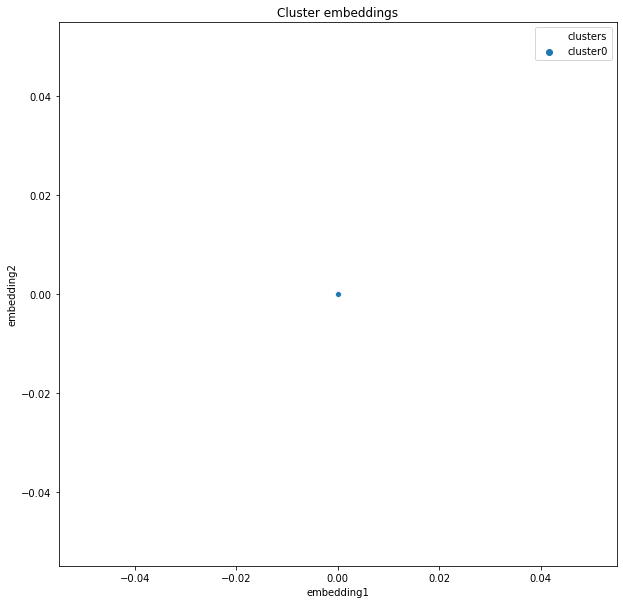

In [41]:
df = pd.DataFrame(Y_train, columns=["s", "p", "o"])

corona = np.unique(np.concatenate((df.s[df.s.str.startswith("Common effects")],df.o[df.o.str.startswith("Common effects")])))
Corona_embeddings = model.get_embeddings(corona, embedding_type='entity')
embeddings_2d = PCA(n_components=1).fit_transform(np.array([i for i in Corona_embeddings]))
 
 #Find clusters of embeddings using KMeans
 
kmeans = KMeans(n_clusters=1, n_init=100, max_iter=500)
clusters = find_clusters(corona, model, kmeans, mode='entity')

# >>> # Plot results
df = pd.DataFrame({"teams": corona, "clusters": "cluster" + pd.Series(clusters).astype(str),
            "embedding1": embeddings_2d[:, 0], "embedding2": embeddings_2d[:, 0]})
# >>>
plt.figure(figsize=(10, 10))
plt.title("Cluster embeddings")
# >>>
ax = sns.scatterplot(data=df, x="embedding1", y="embedding2", hue="clusters")
# >>>
# >>> texts = []
# >>> for i, point in df.iterrows():
# >>>     if np.random.uniform() < 0.1:
# >>>         texts.append(plt.text(point['embedding1']+.02, point['embedding2'], str(point['teams'])))
# >>> adjust_text(texts)